In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import pingouin as pg
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
from statannot import add_stat_annotation
import os
import copy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from scipy import stats
from plotly.subplots import make_subplots


In [2]:
path1 = 'D:/Tianyu/code/python/nist_phase_1/code/UI_VR_Dataset/'
path = path1
data_raw=[]
print(os.listdir(path))
for file_path in os.listdir(path):
    t=pd.read_csv(path+file_path,index_col=0)
    ##t.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
    data_raw.append(t)
participant_num = int(len(data_raw)/2)


['Sub01_ctrl_HMD.csv', 'Sub01_orig_HMD.csv', 'Sub02_ctrl_HMD.csv', 'Sub02_orig_HMD.csv', 'Sub03_ctrl_HMD.csv', 'Sub03_orig_HMD.csv', 'Sub04_ctrl_HMD.csv', 'Sub04_exp_HMD.csv', 'Sub05_ctrl_HMD.csv', 'Sub05_exp_HMD.csv', 'Sub06_ctrl_HMD.csv', 'Sub06_exp_HMD.csv', 'Sub07_ctrl_HMD.csv', 'Sub07_exp_HMD.csv', 'Sub08_ctrl_HMD.csv', 'Sub08_exp_HMD.csv', 'Sub09_ctrl_HMD.csv', 'Sub09_exp_HMD.csv', 'Sub10_ctrl_HMD.csv', 'Sub10_exp_HMD.csv']


D:\Tianyu\software\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
## Test the normality of the data
normal_condition = []
for i in range(participant_num*2):
    normal_condition.append(pg.normality(data_raw[i]['Trend_Sum']))
normal_condition[10:20]
# ax = pg.qqplot(data_raw[6]['Trend_Sum'],dist='norm')
# ax = pg.qqplot(data_raw[7]['Trend_Sum'],dist='norm')
## print(pg.multivariate_normality(np.column_stack((data_raw[6]['Trend_Sum'],data_raw[7]['Trend_Sum'])))) ## Too much data, do not use this

D:\Tianyu\software\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Tianyu\software\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Tianyu\software\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Tianyu\software\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Tianyu\software\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Tianyu\software\anaconda3\l

[             W  pval  normal
 Trend_Sum  1.0   1.0    True,
                   W  pval  normal
 Trend_Sum  0.893645   0.0   False,
                   W          pval  normal
 Trend_Sum  0.994542  2.663526e-30   False,
                   W          pval  normal
 Trend_Sum  0.996648  1.273319e-27   False,
                   W          pval  normal
 Trend_Sum  0.998095  3.023012e-20   False,
                   W          pval  normal
 Trend_Sum  0.995106  3.379788e-33   False,
                   W  pval  normal
 Trend_Sum  0.948855   0.0   False,
                   W  pval  normal
 Trend_Sum  0.978997   0.0   False,
              W  pval  normal
 Trend_Sum  1.0   1.0    True,
              W  pval  normal
 Trend_Sum  1.0   1.0    True]

In [4]:
## Calculate the time of each mission ##
mission_time_all = []
mission_time_control = []
mission_time_test = []
mission_time_seperate = []
mission_time = []
for i in range(participant_num*2):
    if i%2 == 0:
        mission_time_control.append(len(data_raw[i])/90)
    else:
        mission_time_test.append(len(data_raw[i])/90)
    mission_time_all.append(len(data_raw[i])/90)
    if i >=6 :
        time_point = data_raw[i][["missionTargetName"]].duplicated()
        order = time_point[time_point == False]
        for j in range(len(order)-1):
            mission_time.append((order.index[j+1] - order.index[j])/90)

        mission_time_seperate.append(mission_time)
        mission_time = []

mission_time_all_df = pd.DataFrame(mission_time_all, columns = ["Mission_time_all"])
mission_time_all_df['Groups']=np.where(mission_time_all_df.index%2==0, 'Control', 'Test') 


In [5]:
mission_time_seperate

[[141.13333333333333, 250.46666666666667],
 [46.93333333333333, 113.56666666666666, 73.85555555555555],
 [55.077777777777776,
  88.67777777777778,
  104.58888888888889,
  41.87777777777778],
 [100.96666666666667, 70.14444444444445, 32.522222222222226],
 [35.5, 324.06666666666666, 50.27777777777778],
 [134.2111111111111, 88.15555555555555, 27.033333333333335, 58.18888888888889],
 [126.52222222222223, 71.07777777777778, 33.94444444444444, 74.73333333333333],
 [78.2, 286.26666666666665, 61.5],
 [46.833333333333336,
  165.3111111111111,
  139.57777777777778,
  52.06666666666667],
 [109.06666666666666, 255.62222222222223, 74.93333333333334],
 [162.34444444444443, 240.01111111111112, 58.65555555555556],
 [22.522222222222222, 157.26666666666668, 127.12222222222222, 64.1],
 [34.44444444444444, 403.05555555555554],
 [129.3111111111111, 288.23333333333335, 70.4888888888889]]

In [4]:
data_cogload = []
cogload_average = []
for i in range(participant_num):
    cogload_average.append(np.average(data_raw[i*2]["Trend_Sum"]))
    cogload_average.append(np.average(data_raw[i*2+1]["Trend_Sum"]))
    df_cog = pd.concat([data_raw[i*2][["Trend_Sum"]],data_raw[i*2+1][["Trend_Sum"]]],axis=1)
    df_cog.columns = ["CogLoad_Cont_%d" %(i+1), "CogLoad_Test_%d" %(i+1)]
    df_cog = df_cog.stack().to_frame()
    df_cog.reset_index(inplace=True)
    # df_cog.drop(["FrameID"],axis=1,inplace=True)
    # df_cog.rename({"level_1":"Groups","0":"CogLoad"},axis=1,inplace=True)
    df_cog.columns = ["FrameID", "Groups", "CogLoad"]
    data_cogload.append(df_cog)

In [30]:
cogload_average_control = []
cogload_average_test = []
for i in range(participant_num):
    if cogload_average[i*2] !=0 and cogload_average[i*2+1] !=0:
        cogload_average_control.append(cogload_average[i*2])
        cogload_average_test.append(cogload_average[i*2+1])
cogload_average_control_df = pd.DataFrame(cogload_average_control)
cogload_average_control_df["Groups"] = "Control"
cogload_average_test_df = pd.DataFrame(cogload_average_test)
cogload_average_test_df["Groups"] = "Test"
cogload_average_without_0 = pd.concat([cogload_average_control_df,cogload_average_test_df])
cogload_average_without_0.columns = ["CogLoad","Groups"]




In [31]:
cogload_average_without_0

,CogLoad,Groups
0,0.711309,Control
1,1.212909,Control
2,0.483921,Control
3,1.898964,Control
4,0.793167,Control
5,0.355080,Control
6,0.108347,Control
7,1.462553,Control
0,0.737903,Test
1,0.969828,Test


In [20]:
print(pg.wilcoxon(mission_time_control,mission_time_test,alternative='two-sided'))
print(pg.wilcoxon(cogload_average_control,cogload_average_test,alternative='two-sided'))

          W-val alternative     p-val       RBC  CLES
Wilcoxon   26.0   two-sided  0.921875  0.054545  0.51
          W-val alternative     p-val       RBC    CLES
Wilcoxon    7.0   two-sided  0.148438  0.611111  0.5625


In [50]:
for i in range(participant_num):
    print(pg.kruskal(data=data_cogload[i],dv="CogLoad",between="Groups",detailed=True))


         Source  ddof1           H         p-unc
Kruskal  Groups      1  112.405024  2.912897e-26
         Source  ddof1            H  p-unc
Kruskal  Groups      1  4111.150521    0.0
         Source  ddof1            H  p-unc
Kruskal  Groups      1  6608.329753    0.0
         Source  ddof1             H  p-unc
Kruskal  Groups      1  16970.370872    0.0
         Source  ddof1            H  p-unc
Kruskal  Groups      1  1942.392021    0.0
         Source  ddof1             H  p-unc
Kruskal  Groups      1  56110.375004    0.0
         Source  ddof1            H          p-unc
Kruskal  Groups      1  1094.423341  5.381985e-240
         Source  ddof1           H  p-unc
Kruskal  Groups      1  8702.70313    0.0
         Source  ddof1            H          p-unc
Kruskal  Groups      1  1223.754945  4.194968e-268
         Source  ddof1   H  p-unc
Kruskal  Groups      1 NaN    NaN


D:\Tianyu\software\anaconda3\lib\site-packages\pingouin\nonparametric.py:551: RuntimeWarning: invalid value encountered in double_scalars
  H /= scipy.stats.tiecorrect(data['rank'].to_numpy())


In [126]:
for i in range(participant_num):
    print(pg.anova(data=data_cogload[i],dv="CogLoad",between="Groups",detailed=True))

   Source           SS     DF        MS          F         p-unc       np2
0  Groups     7.902383      1  7.902383  64.271918  1.108527e-15  0.001362
1  Within  5796.219463  47142  0.122952        NaN           NaN       NaN
   Source           SS     DF          MS            F  p-unc      np2
0  Groups   684.720565      1  684.720565  4312.907805    0.0  0.08456
1  Within  7412.699125  46691    0.158761          NaN    NaN      NaN
   Source            SS     DF           MS             F  p-unc       np2
0  Groups   5343.124280      1  5343.124280  12585.876418    0.0  0.130852
1  Within  35490.139001  83598     0.424533           NaN    NaN       NaN
   Source            SS     DF           MS             F  p-unc       np2
0  Groups   2000.918960      1  2000.918960  15358.152054    0.0  0.150389
1  Within  11304.077011  86765     0.130284           NaN    NaN       NaN
   Source           SS     DF          MS           F  p-unc       np2
0  Groups   222.883592      1  222.883592

In [38]:
mission_time_all_df

,Mission_time_all,Groups
0,51449,Control
1,35318,Test
2,26125,Control
3,26238,Test
4,36890,Control
5,27687,Test
6,27568,Control
7,38341,Test
8,36346,Control
9,39570,Test


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
Control v.s. Test: Wilcoxon test (paired samples), P_val=1.484e-01 stat=7.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
Control v.s. Test: Wilcoxon test (paired samples), P_val=1.484e-01 stat=7.000e+00


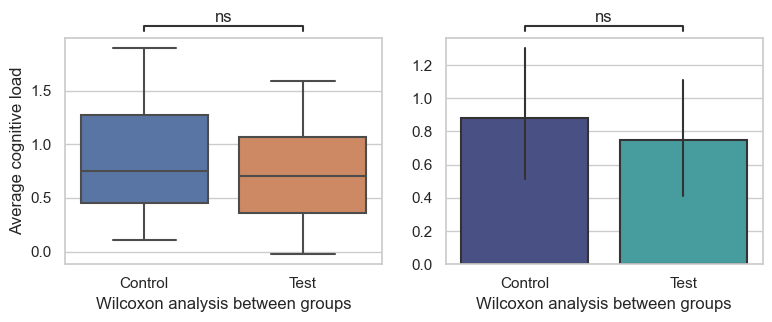

In [34]:
### pair analysis visualization 

sns.set(style = 'whitegrid')

# participant_order = 2
# data = copy.deepcopy(data_cogload[participant_order])
data = cogload_average_without_0
x = 'Groups'
y = 'CogLoad'
hue = 'Groups'
# order = ["CogLoad_Cont_%d" %(participant_order+1), "CogLoad_Test_%d" %(participant_order+1)]
order = ["Control", "Test"]

# data = copy.deepcopy(mission_time_all_df)
# x = 'Groups'
# y = 'Mission_time_all'
# hue = 'Groups'
# order = ["Control", "Test"]



## subplot
fig, axes = plt.subplots(1,2, figsize=(9,3), dpi=100)
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
# axes[0].set_title('Paired Analysis (Greater)')

if 1:
   axes[0] = sns.boxplot(ax = axes[0], data=data, x=x, y=y, order=order)
   test_results = add_stat_annotation(ax=axes[0], data=data, x=x, y=y, order=order,
                                    box_pairs=[(order[0], order[1])],
                                    # test='Kruskal', 
                                    test='Wilcoxon', 
                                    comparisons_correction=None, 
                                    text_format='star', loc='outside', verbose=2,
                                 #    line_offset_to_box= -1,
                                 #    line_offset= 1,
                                 #    text_offset = -1,
                                    #   stats_params={'alternative': 'greater'}
                                    )
   # axes[0].set(xlabel='Paired analysis between conditions (Greater)', ylabel='VRSQ score')
   # axes[0].set(xlabel='Kruskal-Wallis analysis between groups', ylabel='Cognitive Load')
   # axes[0].set(xlabel='Wilcoxon analysis between groups', ylabel='Mission time (s)')
   axes[0].set(xlabel='Wilcoxon analysis between groups', ylabel='Average cognitive load')

if 1:
   axes[1] = sns.barplot(ax = axes[1],data=data, x=x, y=y,
                  palette = 'mako',
                  linewidth=1.5,
                  errcolor="0.2",errwidth =1.5,
                  edgecolor=".2",
                  # facecolor=(1, 1, 1, 0)
                  )
   test_results = add_stat_annotation(ax=axes[1], data=data, x=x, y=y,
                                    box_pairs=[(order[0], order[1])],
                                    # test='Kruskal', 
                                    test='Wilcoxon', 
                                    comparisons_correction=None, 
                                    text_format='star', loc='outside', verbose=1,
                                 #    line_offset_to_box= -0.5,
                                 #    line_offset= -0.5,
                                    #   stats_params={'alternative': 'greater'}
                                    )
   # axes[1].set(xlabel='Paired analysis between conditions (Greater)', ylabel='')
   axes[1].set(xlabel='Wilcoxon analysis between groups', ylabel='')

In [24]:
### sample from raw data 
rate = 20
data_image = copy.deepcopy(data_raw[13])
subset = data_image[::rate]
## 3D Stastic ###
if 0:
    df = subset

    fig = px.scatter_3d(df, x='CameraPosX', y='CameraPosY', z='CameraPosZ',
                color='Trend_Sum',color_continuous_scale=px.colors.sequential.Viridis,symbol='light_state',symbol_sequence=["cross","circle"],opacity=0.8,)
    fig.update_traces(marker_size = 3)

    fig.show()

In [34]:
# TEST UI CHANGE #
data_light = copy.deepcopy(data_raw[11])
data_light["state_change"] = data_light["light_state"].diff()
column_changes = data_light[data_light['state_change'] != 0]
UI_dark_list = column_changes["light_state"][column_changes["light_state"]==False].index
window = 500
cog_before = []
cog_after = []
for i in range(len(UI_dark_list)):
    cog_before.append(np.average(data_light["Trend_Sum"][UI_dark_list[i]-window:UI_dark_list[i]]))
    cog_after.append(np.average(data_light["Trend_Sum"][UI_dark_list[i]:UI_dark_list[i]+window]))
print(cog_before)
print(cog_after)

[0.9732996365999999, 1.732913276, 1.0826214594000003, 1.66654815]
[1.0576719648000001, 1.424643804, 1.466074776, 1.663501132]


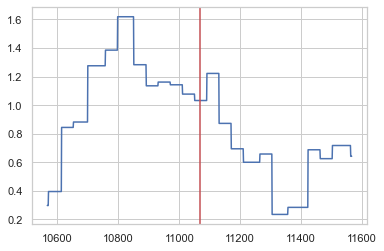

In [32]:
i = 0
plt.plot(data_light["Trend_Sum"][UI_dark_list[i]-window:UI_dark_list[i]+window])
plt.axvline(x=UI_dark_list[i],c="r")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Before_UI_dark v.s. After_UI_dark: Kruskal-Wallis paired samples, P_val=5.499e-92 stat=4.138e+02


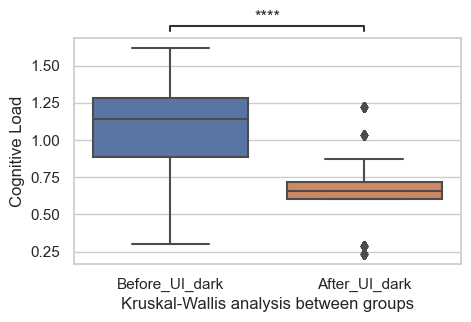

In [33]:
control_df = pd.DataFrame(data_light["Trend_Sum"][UI_dark_list[i]-window:UI_dark_list[i]])
test_df = pd.DataFrame(data_light["Trend_Sum"][UI_dark_list[i]:UI_dark_list[i]+window])
group_1 = "Before_UI_dark"
group_2 = "After_UI_dark"

control_df["Groups"] = group_1
test_df["Groups"] = group_2

combine_df = pd.concat([control_df,test_df])
combine_df.columns = ["CogLoad","Groups"]


data = combine_df
x = 'Groups'
y = 'CogLoad'
hue = 'Groups'
order = [group_1, group_2]

sns.set(style = 'whitegrid')
fig, axes = plt.subplots(1,1, figsize=(5,3), dpi=100)

if 1:
   axes = sns.boxplot(ax = axes, data=data, x=x, y=y, order=order)
   test_results = add_stat_annotation(ax=axes, data=data, x=x, y=y, order=order,
                                    box_pairs=[(order[0], order[1])],
                                    test='Kruskal', 
                                    # test='Wilcoxon', 
                                    comparisons_correction=None, 
                                    text_format='star', loc='outside', verbose=2,
                                    #   stats_params={'alternative': 'greater'}
                                    )
   # axes.set(xlabel='Paired analysis between conditions (Greater)', ylabel='VRSQ score')
   axes.set(xlabel='Kruskal-Wallis analysis between groups', ylabel='Cognitive Load')
   # axes.set(xlabel='Wilcoxon analysis between groups', ylabel='Mission time (s)')
   # axes.set(xlabel='Wilcoxon analysis between groups', ylabel='Average cognitive load')


In [38]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [97]:
test = pg.read_dataset('mixed_anova')
test

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [3]:
### For NASATLX QZ ###
if 0:
    ### convert cat into int  with orders ###
    ordered_satisfaction  = ['None', 'Slight', 'Moderate', 'Severe']
    df_c= data_raw.iloc[:, 0:37]

    for x in range(1,37):
        df_c.iloc[:, x] = pd.Categorical(df_c.iloc[:, x], categories=ordered_satisfaction, ordered=True)

    cat_columns = df_c.select_dtypes(['category']).columns
    df_c[cat_columns] = df_c[cat_columns].apply(lambda x: x.cat.codes)
    # print(df_c.iloc[:, 2])

    df_c.head()


    ### get sum of each conditions ###
    df_c['Control'] = df_c.iloc[:, 1:10].sum(axis=1)
    df_c['Haptic'] = df_c.iloc[:, 10:19].sum(axis=1)
    df_c['Visual'] = df_c.iloc[:, 19:28].sum(axis=1)
    df_c['Multi'] = df_c.iloc[:, 28:37].sum(axis=1)
    # df_c.to_csv('./Survey/1-35/Clean/ResultsSpatial31.csv')


    TB = df_c['Control']
    TH = df_c['Haptic']
    TV = df_c['Visual']
    TM = df_c['Multi']
    print(pg.wilcoxon(TB, TH, tail='one-sided'))
    print(pg.wilcoxon(TB, TV, tail='one-sided'))
    print(pg.wilcoxon(TB, TM, tail='one-sided'))
    print(pg.wilcoxon(TH, TV, tail='one-sided'))
    print(pg.wilcoxon(TH, TM, tail='one-sided'))
    print(pg.wilcoxon(TV, TM, tail='one-sided'))


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
Control v.s. Haptic: Wilcoxon test (paired samples), P_val=5.412e-03 stat=2.755e+02
Using zero_method  wilcox
Control v.s. Visual: Wilcoxon test (paired samples), P_val=2.044e-01 stat=2.230e+02
Using zero_method  wilcox
Control v.s. Multi-modality: Wilcoxon test (paired samples), P_val=5.075e-03 stat=2.395e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
Haptic v.s. Visual: Wilcoxon test (paired samples), P_val=9.024e-01 stat=7.050e+01
Using zero_method  wilcox
Visual v.s. Multi-modality: Wilcoxon test (paired samples), P_val=3.691e-02 stat=2.285e+02
Using zero_method  wilcox
Haptic v.s. Multi-modality: Wilcoxon test (paired samples), P_val=1.455e-01 stat=2

[Text(0.5, 4.750000000000002, 'Paired analysis between conditions (Greater)'),
 Text(457.2045454545454, 0.5, '')]

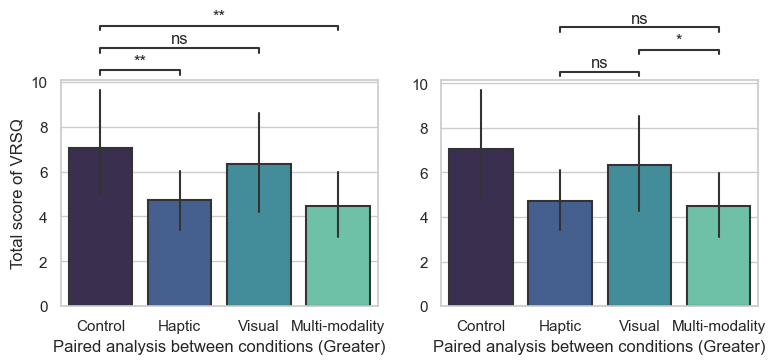

In [73]:
### pair analysis visualization 
FileName= './survey/1-35/Clean/spatial31plot.csv'
df_grouped = pd.read_csv(FileName)
df_grouped.head()

## subplot
fig, axes = plt.subplots(1,2, figsize=(9,3), dpi=100)
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
# axes[0].set_title('Paired Analysis (Greater)')


sns.set(style = 'whitegrid')
x = 'Conditions'
y = 'Total'
hue = 'Conditions'
order = ['Control', 'Haptic', 'Visual', 'Multi-modality']
# order = ['Time_Junction_B', 'Time_Junction_H', 'Time_Junction_V', 'Time_Junction_M']

axes[0] = sns.barplot(ax = axes[0], data=df_grouped, x=x, y=y,
                palette = 'mako',
                linewidth=1.5,
                errcolor="0.2",errwidth =1.5,
                edgecolor=".2",
                # facecolor=(1, 1, 1, 0)
                )
test_results = add_stat_annotation(ax =axes[0],plot='barplot', data=df_grouped, x=x, y=y,
                                   box_pairs=[("Control", "Haptic"), ("Control", "Visual"), ("Control", "Multi-modality")],
                                   test='Wilcoxon', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=1,
                                #    line_offset_to_box= -1,
                                #    line_offset= 1,
                                #    text_offset = -1,
                                   stats_params={'alternative': 'greater'})
axes[0].set(xlabel='Paired analysis between conditions (Greater)', ylabel='VRSQ score')
axes[1] = sns.barplot(ax = axes[1],data=df_grouped, x=x, y=y,
                palette = 'mako',
                linewidth=1.5,
                errcolor="0.2",errwidth =1.5,
                edgecolor=".2",
                # facecolor=(1, 1, 1, 0)
                )
test_results = add_stat_annotation(ax =axes[1],plot='barplot', data=df_grouped, x=x, y=y,
                                   box_pairs=[("Haptic", "Visual"), ("Haptic", "Multi-modality"), ("Visual", "Multi-modality")],
                                   test='Wilcoxon', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=1,
                                #    line_offset_to_box= -0.5,
                                #    line_offset= -0.5,
                                   stats_params={'alternative': 'greater'})
axes[1].set(xlabel='Paired analysis between conditions (Greater)', ylabel='')

In [37]:
### for test 
ordered_satisfaction  = ['None', 'Slight', 'Moderate', 'Severe']

df_raw['test']  = pd.Categorical(df_raw['General'], categories=ordered_satisfaction, ordered=True)
df_raw.test.cat.codes

cat_columns = df_raw.select_dtypes(['category']).columns

df_raw[cat_columns] = df_raw[cat_columns].apply(lambda x: x.cat.codes)
df_raw.head()

dict( zip( df_raw.test.cat.codes, df_raw['test'] ) )
df_raw.test

,Subject,General,Fatigue,Eyestrain,focusing,Headache,Fullness,Blurred,Dizzy,Vertigo,...,General_M,Fatigue_M,Eyestrain_M,focusing_M,Headache_M,Fullness_M,Blurred_M,Dizzy_M,Vertigo_M,test
0,5,None,None,Slight,None,None,None,Slight,None,Slight,...,None,None,None,None,None,Slight,Slight,None,None,0
1,6,Moderate,Slight,None,Slight,None,Moderate,None,None,Severe,...,Slight,None,None,Slight,None,Slight,None,None,Moderate,2
2,7,Slight,Slight,None,None,None,None,None,None,None,...,None,Slight,Moderate,None,Slight,None,Slight,None,Slight,1
3,8,Slight,Moderate,Slight,Slight,Slight,Slight,None,None,None,...,Slight,Moderate,Slight,Slight,Slight,Slight,Slight,None,None,1
4,9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0


0         None
1     Moderate
2       Slight
3       Slight
4         None
5         None
6     Moderate
7         None
8       Slight
9         None
10      Slight
11    Moderate
12      Slight
13      Slight
14    Moderate
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23      Slight
24    Moderate
25      Severe
26        None
27        None
28    Moderate
29      Severe
30        None
Name: test, dtype: category
Categories (4, object): ['None' < 'Slight' < 'Moderate' < 'Severe']

In [10]:
##### Benjamini-Hochberg Procedure ######
def fdr(p_vals):

    from scipy.stats import rankdata
    ranked_p_values = rankdata(p_vals)
    print(ranked_p_values)
    print(p_vals)
    print(p_vals *len(p_vals))
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1

    return fdr

In [14]:
import statsmodels.stats.multitest as smt
# time 
p = [0.000271,0.016742,0.061984,0.083554,0.005899,0.208035]
pvals_corr = smt.multipletests(p,method = "fdr_bh" )
print(pvals_corr)

(array([ True,  True, False, False,  True, False]), array([0.001626 , 0.033484 , 0.092976 , 0.1002648, 0.017697 , 0.208035 ]), 0.008512444610847103, 0.008333333333333333)


In [31]:
# accuracy a
p = [0.015887,0.903155,0.049929,0.191762,0.302397,0.724958]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([False, False, False, False, False, False]), array([0.095322 , 0.903155 , 0.149787 , 0.383524 , 0.4535955, 0.8699496]), 0.008512444610847103, 0.008333333333333333)


In [40]:
# accuracy b
p = [0.056191,0.271071,0.031668,0.232535,0.631573,0.907466]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([False, False, False, False, False, False]), array([0.168573 , 0.4066065, 0.168573 , 0.4066065, 0.7578876, 0.907466 ]), 0.008512444610847103, 0.008333333333333333)


In [41]:
# VRSQ
p = [0.005613,0.207816,0.005289,0.905634,0.148614,0.038018]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([ True, False,  True, False, False, False]), array([0.016839 , 0.2493792, 0.016839 , 0.905634 , 0.222921 , 0.076036 ]), 0.008512444610847103, 0.008333333333333333)


In [42]:
# NASA TLX total
p = [0.027646,0.394432,0.005699,0.094818,0.370891,0.012707]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([False, False,  True, False, False,  True]), array([0.055292, 0.394432, 0.034194, 0.142227, 0.394432, 0.038121]), 0.008512444610847103, 0.008333333333333333)


In [43]:
# NASA TLX mental 
p = [0.000578,0.009357,0.000056,0.032406,0.190228,0.000279]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([ True,  True,  True,  True, False,  True]), array([0.001156 , 0.0140355, 0.000336 , 0.0388872, 0.190228 , 0.000837 ]), 0.008512444610847103, 0.008333333333333333)


In [44]:
# NASA TLX physical 
p = [0.324296,0.771369,0.237097,0.597825 ,0.289527 ,0.105078 ]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([False, False, False, False, False, False]), array([0.486444, 0.771369, 0.486444, 0.71739 , 0.486444, 0.486444]), 0.008512444610847103, 0.008333333333333333)


In [45]:
# NASA TLX time 
p = [0.337442,0.337442,0.327212,0.025789 ,0.584696 ,0.046085 ]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([False, False, False, False, False, False]), array([0.4049304, 0.4049304, 0.4049304, 0.138255 , 0.584696 , 0.138255 ]), 0.008512444610847103, 0.008333333333333333)


In [46]:
# NASA TLX success  
p = [0.009937,0.082897,0.006645,0.113648 ,0.739367 ,0.977299 ]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([ True, False,  True, False, False, False]), array([0.029811 , 0.165794 , 0.029811 , 0.170472 , 0.8872404, 0.977299 ]), 0.008512444610847103, 0.008333333333333333)


In [47]:
# NASA TLX hard  
p = [0.001025,0.011957,0.000208,0.947747 ,0.198721 ,0.002584 ]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([ True,  True,  True, False, False,  True]), array([0.003075 , 0.0179355, 0.001248 , 0.947747 , 0.2384652, 0.005168 ]), 0.008512444610847103, 0.008333333333333333)


In [48]:
# NASA TLX irritated  
p = [0.049425,0.248797,0.013959,0.735773,0.169712,0.050536 ]
pvals_corr = smt.multipletests(p,alpha = 0.05,method = "fdr_bh" )
print(pvals_corr)

(array([False, False, False, False, False, False]), array([0.101072 , 0.2985564, 0.083754 , 0.735773 , 0.254568 , 0.101072 ]), 0.008512444610847103, 0.008333333333333333)


In [11]:
time = [0.000271,0.016742,0.061984,0.083554,0.005899,0.208035]
fdr_time = fdr(time)

[1. 3. 4. 5. 2. 6.]
[0.000271, 0.016742, 0.061984, 0.083554, 0.005899, 0.208035]
[0.000271, 0.016742, 0.061984, 0.083554, 0.005899, 0.208035, 0.000271, 0.016742, 0.061984, 0.083554, 0.005899, 0.208035, 0.000271, 0.016742, 0.061984, 0.083554, 0.005899, 0.208035, 0.000271, 0.016742, 0.061984, 0.083554, 0.005899, 0.208035, 0.000271, 0.016742, 0.061984, 0.083554, 0.005899, 0.208035, 0.000271, 0.016742, 0.061984, 0.083554, 0.005899, 0.208035]


ValueError: operands could not be broadcast together with shapes (36,) (6,) 